In [22]:
%pylab inline
import matplotlib as mpl

from scipy import signal
from scipy.signal import get_window
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual
from matplotlib.ticker import ScalarFormatter, AutoMinorLocator
mpl.rcParams['grid.color'] = 'k'
mpl.rcParams['grid.linestyle'] = ':'
mpl.rcParams['grid.linewidth'] = 0.5
mpl.rcParams['font.size'] = 32
mpl.rcParams['figure.autolayout'] = True
mpl.rcParams['figure.figsize'] = (7.2,4.45)
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 17
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.markersize'] = 6
mpl.rcParams['legend.fontsize'] = 13
mpl.rcParams['mathtext.fontset'] = 'stix'      
mpl.rcParams['font.family'] = 'STIXGeneral'
mpl.rcParams['lines.linewidth'] = 3.5
mpl.rcParams['xtick.labelsize'] = 32
mpl.rcParams['ytick.labelsize'] = 32
mpl.rcParams['legend.fontsize'] = 32
#import seaborn as sns
#sns.set_style('whitegrid')
#sns.set_context('paper', font_scale=1.5)
AVAILABLE_WINDOWS = ['boxcar', 'triang', 'blackman', 'hamming', 'hann', 'bartlett', 
                     'flattop', 'parzen', 'bohman', 'blackmanharris', 'nuttall',
                     'barthann']

      
def plot_windows(windows, Nx=4096):
    # boxcar, triang, blackman, hamming, hann, bartlett, 
    # flattop, parzen, bohman, blackmanharris, nuttall, 
    # barthann, 
    
    # kaiser (needs beta), 
    # gaussian (needs standard deviation), 
    # general_gaussian (needs power, width), 
    # slepian (needs width), 
    # dpss (needs normalized half-bandwidth), 
    # chebwin (needs attenuation), 
    # exponential (needs decay scale), 
    # tukey (needs taper fraction)
    if not isinstance(windows, tuple):
        windows = [windows]
    fig, ax = plt.subplots(figsize=(16, 12))
    for window in windows:
        gwindow = get_window(window, Nx=Nx)
        ax.plot(gwindow, label=window, linestyle='-.')

    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_xlabel('')
    ax.yaxis.set_major_formatter(ScalarFormatter())
    ax.yaxis.major.formatter._useMathText = True
    ax.yaxis.set_minor_locator(  AutoMinorLocator(5))
    ax.xaxis.set_minor_locator(  AutoMinorLocator(5))
    ax.tick_params(direction='out', length=12, 
                   width=2, 
                   grid_alpha=0.5)
    ax.tick_params(direction='out', which='minor', length=6, 
                   width=1, 
                   grid_alpha=0.5)
    ax.grid(True)

    fig.tight_layout()

    
select = widgets.SelectMultiple(
    options=AVAILABLE_WINDOWS,
    value=('flattop',),
    disabled=False,
)
interact(plot_windows, windows=select, Nx=(1, 4097))


Populating the interactive namespace from numpy and matplotlib


interactive(children=(SelectMultiple(description='windows', index=(6,), options=('boxcar', 'triang', 'blackman…

<function __main__.plot_windows(windows, Nx=4096)>

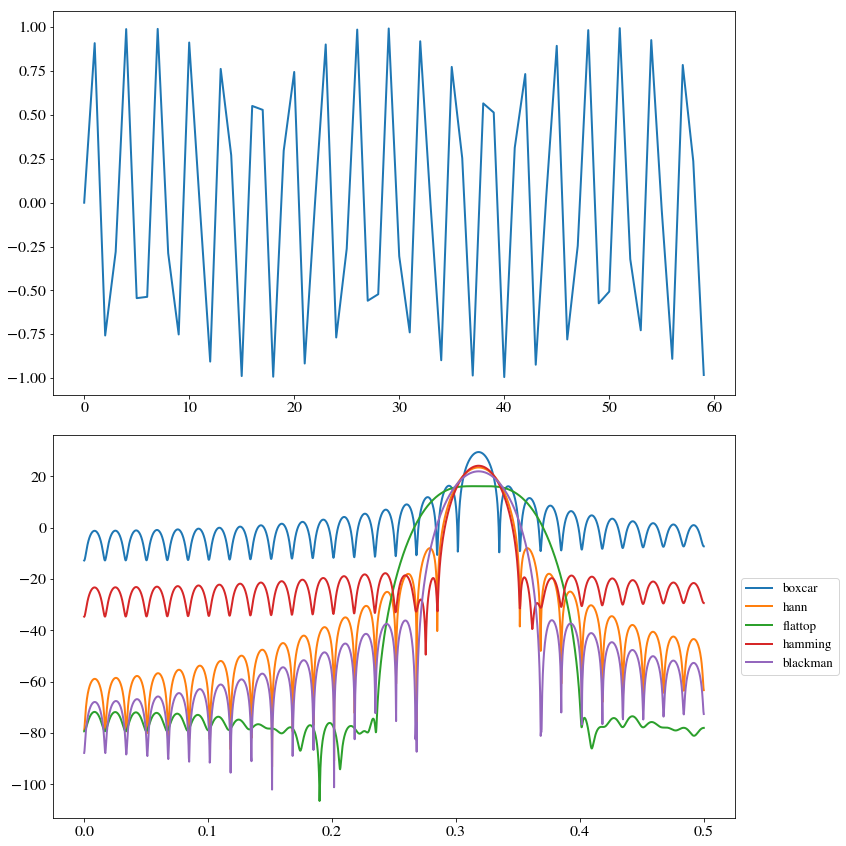

In [10]:
fig = plt.figure(figsize=(12, 12))
ax = plt.subplot(211)
t = np.arange(0, 60, step=1)
s = np.sin( t * 2)

ax.plot(t, s)
ax = plt.subplot(212)
for window in ['boxcar', 'hann', 'flattop', 'hamming', 'blackman']:
    n = 4096
    w = np.fft.rfft(s * get_window(window, 60), n=n)
    freqs = np.fft.rfftfreq(n, d=t[1] - t[0])
    ax.plot(freqs, 20*np.log10(np.abs(w)), label=window)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.tight_layout()
ax.set_label('decibels')
fig.savefig('window_comparison.pdf')

In [ ]:
hamming_fft = np.fft.rfft(hamming)


In [ ]:
hamming_freqs = np.fft.rfftfreq(hamming.size, d=1/Nx)


In [ ]:
plt.plot(hamming_freqs, np.abs(hamming_fft))
plt.xlim(0, 20)


In [ ]:
t = np.arange(0, 1, step=1/1000.)
s = np.sin(2 * np.pi * 10.1 * t) + 0.025 * np.sin(2 * np.pi * 15.2 * t)
plt.plot(t, s)

In [ ]:
fig = plt.figure(figsize=(12, 12))
ax = plt.subplot(211)
t = np.arange(0, 60, step=1)
s = np.sin( t * 2)

ax.plot(t, s)
ax = plt.subplot(212)
for window in ['boxcar', 'hann', 'flattop', 'hamming', 'blackman']:
    n = 4096
    w = np.fft.rfft(s * get_window(window, 60), n=n)
    freqs = np.fft.rfftfreq(n, d=t[1] - t[0])
    ax.plot(freqs, 20*np.log10(np.abs(w)), label=window)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.tight_layout()
ax.set_label('decibels')
fig.savefig('window_comparison.pdf')